In [32]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('train_rmvnan_0207_ver1.csv',low_memory=False)
df.head()

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_source,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent
0,1131660440785968503,2016-09-02,1472830385,1,2016-09-02 15:33:05,Organic Search,Chrome,Windows,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,377306020877927890,2016-09-03,1472880147,1,2016-09-03 05:22:27,Organic Search,Firefox,Macintosh,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
2,3895546263509774583,2016-09-03,1472865386,1,2016-09-03 01:16:26,Organic Search,Chrome,Windows,False,desktop,...,google,organic,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN
3,4763447161404445595,2016-09-03,1472881213,1,2016-09-03 05:40:13,Organic Search,UC Browser,Linux,False,desktop,...,google,organic,google + online,NaN,NaN,0.0,NaN,NaN,NaN,NaN
4,27294437909732085,2016-09-02,1472822600,2,2016-09-02 13:23:20,Organic Search,Chrome,Android,True,mobile,...,google,organic,(not provided),True,NaN,0.0,NaN,NaN,NaN,NaN


In [33]:
df['visitStartTime'] = pd.to_datetime(df['visitStartTime'], errors='coerce')
df['VisitCycle'] = df['visitStartTime'].dt.strftime('%Y.%W')


df.sample(3)

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_medium,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent,VisitCycle
758942,3129924694772444686,2016-08-07,1470545087,1,2016-08-07 04:44:47,Social,Safari,Macintosh,False,desktop,...,referral,NaN,NaN,/yt/about/,0.0,NaN,NaN,NaN,NaN,2016.31
385120,141927006590463729,2017-04-04,1491278966,1,2017-04-04 04:09:26,Direct,Chrome,Macintosh,False,desktop,...,(none),NaN,True,NaN,0.0,NaN,NaN,NaN,NaN,2017.14
105859,8516811276962449523,2017-02-13,1487023356,1,2017-02-13 22:02:36,Direct,Chrome,Windows,False,desktop,...,(none),NaN,True,NaN,0.0,NaN,NaN,NaN,NaN,2017.07


In [34]:
first_visit = df.groupby('fullVisitorId').visitStartTime.min()
first_visit = first_visit.dt.strftime('%Y.%W')
first_visit.sample(4)
 
 

fullVisitorId
8751067058636979993    2017.26
7893894517958973616    2017.11
971112503159770146     2017.21
3530394400725567554    2017.16
Name: visitStartTime, dtype: object

In [35]:
df = df.set_index('fullVisitorId')
 

df['FirstVisit'] = first_visit
 
df.reset_index(inplace = True)
 
df.sample(3)
 

,fullVisitorId,date,visitId,visitNumber,visitStartTime,channelGrouping,device_browser,device_operatingSystem,device_isMobile,device_deviceCategory,...,trafficSource_keyword,trafficSource_isTrueDirect,trafficSource_referralPath,trafficSource_adwordsClickInfo_page,trafficSource_adwordsClickInfo_slot,trafficSource_adwordsClickInfo_adNetworkType,trafficSource_adwordsClickInfo_isVideoAd,trafficSource_adContent,VisitCycle,FirstVisit
169256,01014188693341110,2017-02-17,1487354334,1,2017-02-17 17:58:54,Referral,Chrome,Windows,False,desktop,...,NaN,NaN,/,0.0,NaN,NaN,NaN,NaN,2017.07,2017.07
731644,9275740735751035515,2017-05-30,1496148139,18,2017-05-30 12:42:19,Referral,Chrome,Macintosh,False,desktop,...,NaN,True,/,0.0,NaN,NaN,NaN,NaN,2017.22,2017.06
663884,0412730139429843363,2017-05-08,1494216943,1,2017-05-08 04:15:43,Organic Search,Chrome,Android,True,mobile,...,(not provided),NaN,NaN,0.0,NaN,NaN,NaN,NaN,2017.19,2017.19


In [36]:
co1 = df.groupby(['FirstVisit', 'VisitCycle']).fullVisitorId.nunique()
co1 = co1.reset_index()
co1.rename({'fullVisitorId': 'TotalVisitor'}, axis = 1, inplace = True)

In [37]:
co1

,FirstVisit,VisitCycle,TotalVisitor
0,2016.31,2016.31,13476
1,2016.31,2016.32,675
2,2016.31,2016.33,443
3,2016.31,2016.34,316
4,2016.31,2016.35,279
...,...,...,...
1459,2017.29,2017.30,465
1460,2017.29,2017.31,105
1461,2017.30,2017.30,12152
1462,2017.30,2017.31,236


In [46]:
from ipypb import ipb

temp_week_diff = []

for i in ipb(range(co1.shape[0])):
    # '2016.31'과 같은 형식을 '2016-31'로 변경
    formatted_first_visit = co1.FirstVisit[i].replace('.', '-') + '-1'  # 1일로 설정
    formatted_visit_cycle = co1.VisitCycle[i].replace('.', '-') + '-1'  # 1일로 설정
    
    
    f_first_visit = pd.to_datetime(formatted_first_visit, format='%Y-%W-%w')
    f_visit_cycle = pd.to_datetime(formatted_visit_cycle, format='%Y-%W-%w')
    week_diff = (f_visit_cycle - f_first_visit).days // 7
    
    temp_week_diff.append(week_diff)

# 새로운 리스트를 사용하여 'CohortPeriodWeek' 열에 값을 할당
co1['CohortPeriodWeek'] = temp_week_diff

 [████████████████████████████████████████████████████████████] 1464/1464 [00:00<00:00, 0.00s/it]

In [48]:
co1.sample(5)

,FirstVisit,VisitCycle,TotalVisitor,CohortPeriodWeek
939,2016.52,2017.24,2,24
697,2016.46,2016.46,22820,0
813,2016.49,2016.52,130,3
1184,2017.08,2017.28,13,20
655,2016.44,2017.30,5,38


In [52]:
# 중복된 조합 확인
duplicate_combinations = co1.duplicated(subset=['FirstVisit', 'CohortPeriodWeek'])

# 중복된 조합 제거
co1_no_duplicates = co1[~duplicate_combinations]

# unstack 시도
co_retention = co1_no_duplicates.set_index(['FirstVisit', 'CohortPeriodWeek'])
co_retention = co_retention.TotalVisitor.unstack(1)
retention = co_retention.div(co_retention[0], axis=0)

In [54]:
# 중복된 조합 확인
duplicate_combinations = co1.duplicated(subset=['FirstVisit', 'CohortPeriodWeek'], keep=False)
duplicates = co1[duplicate_combinations].sort_values(by=['FirstVisit', 'CohortPeriodWeek'])

# 중복된 조합 출력
print(duplicates)


    FirstVisit VisitCycle  TotalVisitor  CohortPeriodWeek
21     2016.31    2016.52            24                21
22     2016.31    2017.00             1                21
125    2016.33    2016.52            14                19
126    2016.33    2017.00             1                19
176    2016.34    2016.52            13                18
177    2016.34    2017.00             1                18
274    2016.36    2016.52             8                16
275    2016.36    2017.00             1                16
366    2016.38    2016.52            14                14
367    2016.38    2017.00             2                14
412    2016.39    2016.52            20                13
413    2016.39    2017.00             1                13
456    2016.40    2016.52            24                12
457    2016.40    2017.00             1                12
499    2016.41    2016.52            19                11
500    2016.41    2017.00             2                11
542    2016.42

In [55]:
# 'VisitCycle' 제외하고 중복 확인
duplicate_combinations = co1[['FirstVisit', 'CohortPeriodWeek']].duplicated(keep=False)
duplicates = co1[duplicate_combinations].sort_values(by=['FirstVisit', 'CohortPeriodWeek'])

# 중복된 조합 출력
print(duplicates)

    FirstVisit VisitCycle  TotalVisitor  CohortPeriodWeek
21     2016.31    2016.52            24                21
22     2016.31    2017.00             1                21
125    2016.33    2016.52            14                19
126    2016.33    2017.00             1                19
176    2016.34    2016.52            13                18
177    2016.34    2017.00             1                18
274    2016.36    2016.52             8                16
275    2016.36    2017.00             1                16
366    2016.38    2016.52            14                14
367    2016.38    2017.00             2                14
412    2016.39    2016.52            20                13
413    2016.39    2017.00             1                13
456    2016.40    2016.52            24                12
457    2016.40    2017.00             1                12
499    2016.41    2016.52            19                11
500    2016.41    2017.00             2                11
542    2016.42

In [57]:
# 중복된 조합을 제거하여 고유한 값으로 새로운 데이터프레임 생성
unique_combinations = co1[['FirstVisit', 'CohortPeriodWeek']].drop_duplicates()

# 중복을 제거한 데이터프레임과 원본 데이터프레임을 합침
co_unique = pd.merge(unique_combinations, co1, on=['FirstVisit', 'CohortPeriodWeek'], how='inner')

# 'VisitCycle' 값이 '2016.52' 및 '2017.00' 중 어느 것을 선택할지 결정 필요
# 여기서는 첫 번째로 나타난 값을 선택
co_unique = co_unique.groupby(['FirstVisit', 'CohortPeriodWeek']).first().reset_index()

# 결과 확인
print(co_unique)

     FirstVisit  CohortPeriodWeek VisitCycle  TotalVisitor
0       2016.31                 0    2016.31         13476
1       2016.31                 1    2016.32           675
2       2016.31                 2    2016.33           443
3       2016.31                 3    2016.34           316
4       2016.31                 4    2016.35           279
...         ...               ...        ...           ...
1440    2017.29                 1    2017.30           465
1441    2017.29                 2    2017.31           105
1442    2017.30                 0    2017.30         12152
1443    2017.30                 1    2017.31           236
1444    2017.31                 0    2017.31          4237

[1445 rows x 4 columns]


In [58]:
co_retention = co_unique.set_index(['FirstVisit', 'CohortPeriodWeek'])
co_retention = co_retention.TotalVisitor.unstack(1)
retention = co_retention.div(co_retention[0],axis = 0)

In [59]:
retention

CohortPeriodWeek,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
FirstVisit,,,,,,,,,,,,,,,,,,,,,
2016.31,1.0,0.050089,0.032873,0.023449,0.020703,0.016103,0.014693,0.012689,0.010389,0.012021,...,0.000816,0.001113,0.000816,0.000816,0.000965,0.000742,0.000668,0.001113,0.001187,0.000371
2016.32,1.0,0.041353,0.024897,0.018300,0.012981,0.011775,0.008512,0.006597,0.007377,0.005745,...,0.000497,0.000497,0.000709,0.000355,0.000284,0.000638,0.000355,0.000426,0.000071,NaN
2016.33,1.0,0.034276,0.021137,0.016781,0.014424,0.008997,0.006070,0.007141,0.005570,0.004999,...,0.000428,0.000785,0.000214,0.000357,0.000571,0.000286,0.000286,0.000143,NaN,NaN
2016.34,1.0,0.029229,0.016954,0.013886,0.011738,0.007135,0.008746,0.006291,0.004143,0.003529,...,0.000537,0.000230,0.000153,0.000460,0.000614,0.000153,0.000153,NaN,NaN,NaN
2016.35,1.0,0.027223,0.016521,0.014150,0.010774,0.009122,0.006393,0.004956,0.003879,0.003520,...,0.000072,0.000575,0.000287,0.000359,0.000215,0.000215,NaN,NaN,NaN,NaN
2016.36,1.0,0.028878,0.015887,0.011661,0.013304,0.006417,0.005322,0.004069,0.002661,0.002739,...,0.000235,0.000078,0.000235,0.000078,NaN,NaN,NaN,NaN,NaN,NaN
2016.37,1.0,0.031431,0.017580,0.018721,0.013318,0.008447,0.005632,0.004871,0.004414,0.004414,...,0.000381,0.000533,0.000685,0.000076,NaN,NaN,NaN,NaN,NaN,NaN
2016.38,1.0,0.031557,0.020912,0.013740,0.010494,0.006870,0.005662,0.005058,0.005285,0.003926,...,0.000075,0.000151,0.000075,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016.39,1.0,0.031810,0.017153,0.012787,0.010058,0.007095,0.006393,0.004756,0.004288,0.004366,...,0.000312,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='CohortPeriodWeek', ylabel='FirstVisit'>

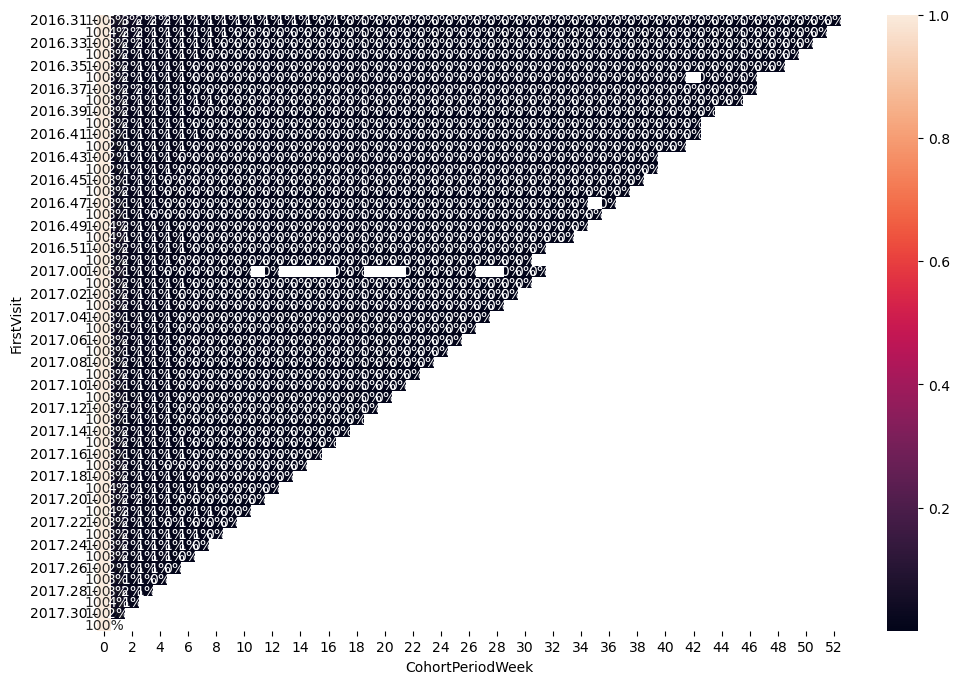

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns
 
## 재방문율 시각화 진행
plt.rcParams['figure.figsize'] = (12, 8)
sns.heatmap(retention, annot = True, fmt = '.0%')